In [1]:
import pandas as pd

data = pd.read_csv("http://raptor.kent.ac.uk/~ds756/kc_house_data_small.csv")

data["unit_price"] = (data["price"] / data["sqft_living"]) #Working out the average price per sqft

#data.head()
print(data)

              id             date     price  bedrooms  bathrooms  sqft_living  \
0     7129300520  20141013T000000  221900.0         3       1.00         1180   
1     1423800210  20140923T000000  230000.0         3       1.00         1640   
2     2125049131  20140729T000000  680000.0         3       1.75         1620   
3     5318101765  20140602T000000  985000.0         3       1.75         1670   
4     6624300110  20140623T000000  375000.0         4       2.50         1870   
...          ...              ...       ...       ...        ...          ...   
2608   263000018  20140521T000000  360000.0         3       2.50         1530   
2609  6600060120  20150223T000000  400000.0         4       2.50         2310   
2610  1523300141  20140623T000000  402101.0         2       0.75         1020   
2611   291310100  20150116T000000  400000.0         3       2.50         1600   
2612  1523300157  20141015T000000  325000.0         2       0.75         1020   

      sqft_lot  floors  wat

In [2]:
#Getting relevant columns and finding unit_price mean
df2 = pd.DataFrame(data.groupby(["zipcode"])["unit_price"].mean()) 
df2["unit_price"] = df2["unit_price"].round(2) #Rounding to 2 decimals

#df2.head()
print(df2)

         unit_price
zipcode            
98001        155.79
98002        152.28
98003        158.40
98004        481.39
98005        294.32
...             ...
98177        288.46
98178        177.01
98188        160.87
98198        180.49
98199        358.48

[70 rows x 1 columns]


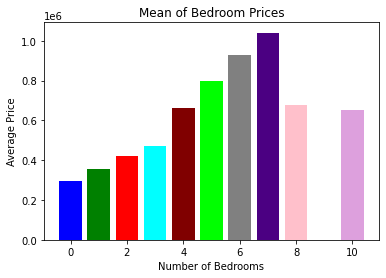

In [3]:
import matplotlib.pyplot as plt
import random

#Getting the relevant data from the dataframe and finding mean for price
avrgBedroom = pd.DataFrame(data.groupby(["bedrooms"])["price"].mean()) 
avrgBedroom["price"] = avrgBedroom["price"].round(2) #Rounding to 2 decimals

#Creating the x and y axis as lists
x = avrgBedroom.index.tolist() #Index corresponds to no. rooms
y = avrgBedroom["price"].tolist()

#Building bar chart with range of colours for bars
plt.bar(x, y, color=["blue", "green", "red", "cyan", "maroon", 
                    "lime", "gray", "indigo", "pink", "plum"])
#Labels and title
plt.xlabel("Number of Bedrooms")
plt.ylabel("Average Price")
plt.title("Mean of Bedroom Prices")
plt.show()


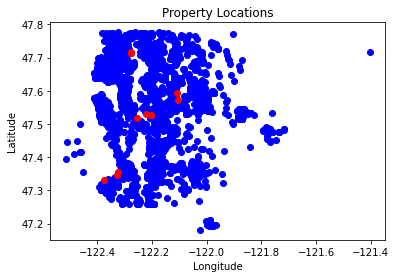

In [4]:
#Finding the waterfront and non-waterfront properties based on first dataframe
wtrfrnt = pd.DataFrame(data[data["waterfront"] == 1])
nonwtrfrnt = pd.DataFrame(data[data["waterfront"] == 0])

#creating x and y for non-waterfront properties
x = nonwtrfrnt["long"].tolist()
y = nonwtrfrnt["lat"].tolist()
plt.scatter(x,y, color="blue", label="Non-Waterfront") #plotting scatter

#Creating x and y for waterfront properties
x = wtrfrnt["long"].tolist()
y = wtrfrnt["lat"].tolist()
plt.scatter(x, y, color="red", label="Waterfront") #plotting scatter

#Labeling and title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Property Locations")
plt.show()